<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/machine_oil/machine_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 건설기계 오일 상태 분류 AI 경진대회
대회 사이트 : https://dacon.io/competitions/official/236013/overview/description

건설장비에서 작동오일의 상태를 실시간으로 모니터링하기 위한 오일 상태 판단 모델 개발 (정상, 이상의 이진분류)

# 목차
0. 데이터로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 제출
5. 결론

* 참고
https://dacon.io/competitions/official/236013/codeshare/7326?page=1&dtype=recent

# 0.데이터로드

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!cp /gdrive/MyDrive/Dacon_study/machine_oil/train.csv ./
!cp /gdrive/MyDrive/Dacon_study/machine_oil/test.csv ./
!cp /gdrive/MyDrive/Dacon_study/machine_oil/sample_submission.csv ./

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14095 entries, 0 to 14094
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14095 non-null  object 
 1   COMPONENT_ARBITRARY  14095 non-null  object 
 2   ANONYMOUS_1          14095 non-null  int64  
 3   YEAR                 14095 non-null  int64  
 4   SAMPLE_TRANSFER_DAY  14095 non-null  int64  
 5   ANONYMOUS_2          14095 non-null  int64  
 6   AG                   14095 non-null  int64  
 7   AL                   14095 non-null  int64  
 8   B                    14095 non-null  int64  
 9   BA                   14095 non-null  int64  
 10  BE                   14095 non-null  int64  
 11  CA                   14095 non-null  int64  
 12  CD                   12701 non-null  float64
 13  CO                   14095 non-null  int64  
 14  CR                   14095 non-null  int64  
 15  CU                   14095 non-null 

* component_arbitrary : 샘플 오일 관련 부품(4종, 비식별화)
* anonymous_1 : 무명 feature 1, 수치형
* year : 오일 샘플 및 진단 해 (Year)
* SAMPLE_TRANSFER_DAY : 오일 샘플링 후 진단 기관으로 이동한 기간 (Days)

In [6]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [ ]:
test.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,TEST_0000,COMPONENT1,2192,2016,200,0,0,0,1,12,0.0,0,0,0,10,0,0,91.3,1091
1,TEST_0001,COMPONENT3,2794,2011,200,0,0,2,1,278,0.0,3,0,0,2732,1,0,126.9,12
2,TEST_0002,COMPONENT2,1982,2010,200,0,0,0,16,5,0.0,0,0,0,11,0,0,44.3,714
3,TEST_0003,COMPONENT3,1404,2009,200,0,0,3,4,163,0.0,4,3,0,8007,0,0,142.8,94
4,TEST_0004,COMPONENT2,8225,2013,200,0,0,0,6,13,0.0,0,0,0,16,0,0,63.4,469


In [7]:
print(train.shape)
print(test.shape)

(14095, 54)
(6041, 19)


## Data Cleansing

In [8]:
train.isnull().sum()

ID                         0
COMPONENT_ARBITRARY        0
ANONYMOUS_1                0
YEAR                       0
SAMPLE_TRANSFER_DAY        0
ANONYMOUS_2                0
AG                         0
AL                         0
B                          0
BA                         0
BE                         0
CA                         0
CD                      1394
CO                         0
CR                         0
CU                         0
FH2O                   10205
FNOX                   10205
FOPTIMETHGLY           10205
FOXID                  10205
FSO4                   10205
FTBN                   10205
FE                         0
FUEL                   10205
H2O                        0
K                       2299
LI                         0
MG                         0
MN                         0
MO                         0
NA                         0
NI                         0
P                          0
PB                         0
PQINDEX       

In [9]:
train.drop(columns=['FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20','U14','U6','U4','V100'],inplace=True)
train.isnull().sum()

ID                        0
COMPONENT_ARBITRARY       0
ANONYMOUS_1               0
YEAR                      0
SAMPLE_TRANSFER_DAY       0
ANONYMOUS_2               0
AG                        0
AL                        0
B                         0
BA                        0
BE                        0
CA                        0
CD                     1394
CO                        0
CR                        0
CU                        0
FE                        0
H2O                       0
K                      2299
LI                        0
MG                        0
MN                        0
MO                        0
NA                        0
NI                        0
P                         0
PB                        0
PQINDEX                   0
S                         0
SB                        0
SI                        0
SN                        0
TI                        0
V                         0
V40                       0
ZN                  

In [10]:
test.isnull().sum()

ID                     0
COMPONENT_ARBITRARY    0
ANONYMOUS_1            0
YEAR                   0
ANONYMOUS_2            0
AG                     0
CO                     0
CR                     0
CU                     0
FE                     0
H2O                    0
MN                     0
MO                     0
NI                     0
PQINDEX                0
TI                     0
V                      0
V40                    0
ZN                     0
dtype: int64

In [11]:
print(train.shape)
print(test.shape)

(14095, 37)
(6041, 19)


# 1. 데이터 EDA, visualization

In [ ]:
# 상관계수
corr = train.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,CD,CO,CR,CU,FE,H2O,K,LI,MG,MN,MO,NA,NI,P,PB,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
ANONYMOUS_1,1.000000,0.106546,-0.041395,0.072154,-0.025674,0.017924,0.013467,-0.064204,-0.010805,-0.015321,0.010076,-0.003783,-0.007035,-0.014086,0.000440,0.003868,-0.004384,0.000944,-0.001807,-0.004212,-0.006206,0.000183,-0.007862,-0.013647,-0.000499,0.002277,0.016374,-0.011797,0.005141,-0.009564,0.001832,0.001883,0.019542,-0.019991,0.044197
YEAR,0.106546,1.000000,-0.094086,0.138199,-0.129124,-0.017525,0.011145,-0.098589,-0.063859,0.090465,-0.012668,-0.052337,-0.028871,-0.137593,-0.057709,0.009855,-0.032801,0.002697,0.025616,-0.039132,-0.091482,0.028953,-0.049206,-0.143675,-0.031021,-0.067160,-0.141084,-0.019612,0.011831,-0.065335,0.006399,-0.027624,-0.051584,0.048572,-0.087871
SAMPLE_TRANSFER_DAY,-0.041395,-0.094086,1.000000,-0.000060,0.021211,-0.017493,0.004305,0.016909,0.009600,0.008826,-0.006108,0.002195,-0.001495,0.006303,0.011651,-0.007926,0.012344,-0.002275,0.008802,0.006816,0.001051,-0.006263,0.015599,-0.009730,0.000543,0.033622,0.014327,-0.015647,0.007713,0.006986,-0.002855,-0.002412,0.013896,-0.019428,-0.004315
ANONYMOUS_2,0.072154,0.138199,-0.000060,1.000000,-0.006266,-0.022788,-0.100307,-0.011871,0.011162,-0.043046,0.012702,-0.000070,-0.001826,-0.002244,-0.004608,-0.003760,-0.003246,-0.002483,-0.003306,0.003304,-0.008465,0.000647,-0.003914,0.000771,0.000519,-0.010409,-0.033153,0.006001,0.007633,0.004799,-0.000981,-0.006469,-0.025339,0.032758,-0.033641
AG,-0.025674,-0.129124,0.021211,-0.006266,1.000000,0.019600,-0.028131,0.031649,0.020884,-0.004489,0.004325,0.008861,0.005397,0.051046,0.025959,-0.003850,0.013082,0.002394,-0.009523,0.019507,0.013124,-0.007197,0.054014,0.024517,0.020716,0.030929,0.017271,0.028327,0.020739,0.016582,0.003609,-0.003853,0.013592,0.002631,0.014671
AL,0.017924,-0.017525,-0.017493,-0.022788,0.019600,1.000000,0.000037,0.240863,-0.000858,-0.070322,-0.004580,0.009920,0.011430,0.037530,0.051138,-0.000093,0.037586,0.000008,-0.001625,0.033695,-0.002615,-0.002290,0.099946,-0.022301,-0.004914,0.030492,0.011343,0.003998,0.087274,-0.006664,0.062613,0.026213,0.013823,-0.024873,0.370512
B,0.013467,0.011145,0.004305,-0.100307,-0.028131,0.000037,1.000000,-0.045454,-0.013252,0.356121,-0.018408,0.005536,0.003759,0.000142,0.003075,-0.005442,-0.004724,0.015888,0.003456,0.000792,-0.001100,0.004937,0.010686,-0.004137,0.008009,-0.003177,0.005926,-0.019423,0.004165,-0.000990,0.008712,0.018197,-0.000882,-0.006463,-0.029787
BA,-0.064204,-0.098589,0.016909,-0.011871,0.031649,0.240863,-0.045454,1.000000,0.029900,-0.008642,-0.001110,0.004970,0.000443,0.023212,0.012627,-0.005055,0.007964,-0.005337,-0.006470,0.007149,-0.004351,-0.004076,0.018465,0.003426,0.000497,0.003411,0.013244,0.006005,0.010588,0.004767,0.005074,0.000480,0.004150,-0.009574,0.104840
BE,-0.010805,-0.063859,0.009600,0.011162,0.020884,-0.000858,-0.013252,0.029900,1.000000,0.006735,-0.002690,0.014084,0.002712,-0.001388,0.002707,-0.001610,0.003115,-0.000977,0.045744,-0.000759,0.000208,-0.005445,0.001227,0.024291,0.006927,-0.000746,0.002929,0.007266,-0.002948,0.025744,-0.002501,0.000482,0.001359,0.012394,0.010685
CA,-0.015321,0.090465,0.008826,-0.043046,-0.004489,-0.070322,0.356121,-0.008642,0.006735,1.000000,-0.005770,0.001185,-0.015970,0.008900,-0.012488,-0.013057,-0.007404,-0.003960,0.023333,0.011866,-0.001413,0.014019,-0.003472,0.032399,0.022724,-0.003129,-0.078747,0.022265,-0.006390,-0.006153,-0.013781,-0.014419,-0.059102,0.110625,-0.150379


In [ ]:
train.describe()

,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,BE,CA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
count,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,...,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000,14095.000000
mean,3146.082937,2013.652501,7.600568,387.416885,0.025825,12.707698,64.026179,0.692799,0.006314,1366.757574,...,415.159631,12029.318624,0.476978,35.058248,0.909826,0.707911,0.050656,109.355815,588.646825,0.085349
std,4216.089809,3.964758,11.681628,550.016073,0.171926,86.968000,102.876871,2.905491,0.152189,1481.924727,...,1528.191012,9325.610196,2.729936,195.329029,3.604276,6.897579,0.475438,49.612379,531.743393,0.279411
min,1000.000000,2007.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.900000,0.000000,0.000000
25%,1655.000000,2010.000000,3.000000,200.000000,0.000000,1.000000,3.000000,0.000000,0.000000,48.000000,...,12.000000,4440.500000,0.000000,3.000000,0.000000,0.000000,0.000000,71.800000,37.000000,0.000000
50%,2227.000000,2014.000000,5.000000,200.000000,0.000000,2.000000,11.000000,0.000000,0.000000,198.000000,...,29.000000,8034.000000,0.000000,6.000000,0.000000,0.000000,0.000000,111.300000,520.000000,0.000000
75%,3797.000000,2017.000000,8.000000,410.000000,0.000000,4.000000,110.000000,0.000000,0.000000,2975.000000,...,181.000000,19750.000000,0.000000,12.000000,1.000000,0.000000,0.000000,137.200000,1119.000000,0.000000
max,294451.000000,2022.000000,368.000000,9650.000000,3.000000,4630.000000,2051.000000,216.000000,9.000000,6609.000000,...,56761.000000,64160.000000,103.000000,5459.000000,289.000000,403.000000,17.000000,2840.500000,2132.000000,1.000000


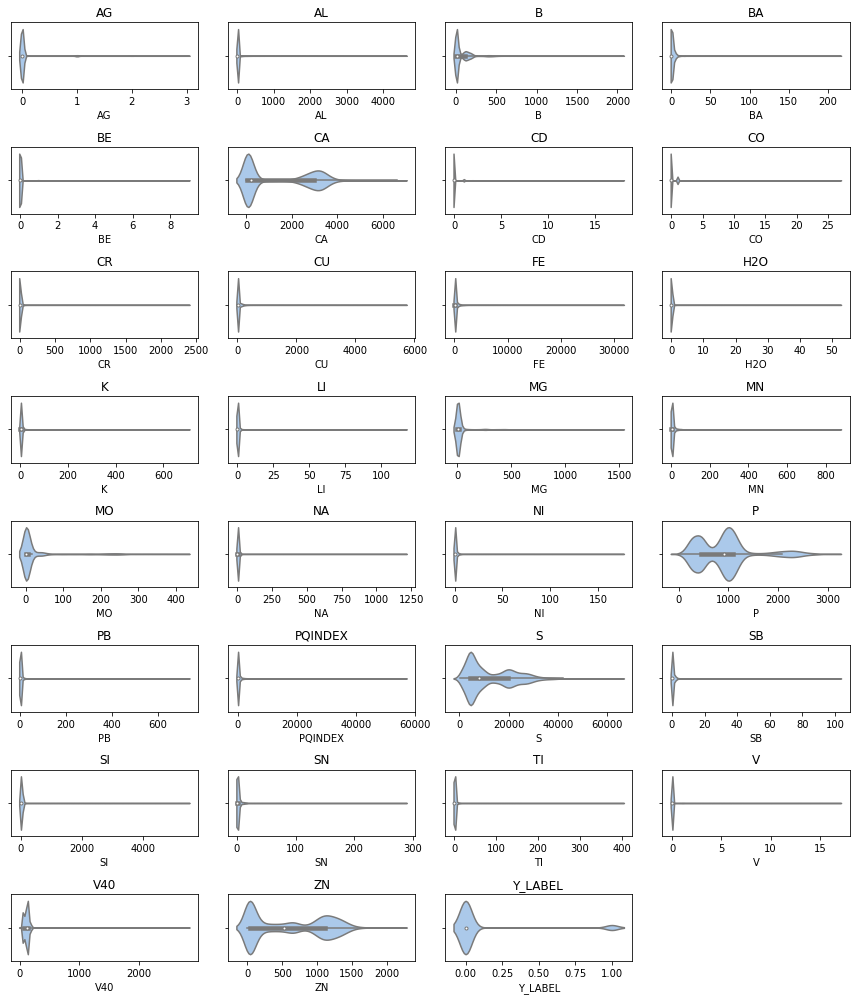

In [ ]:
plt.figure(figsize=(12,14))

cols=train.columns[6:]
for i in range(len(cols)):
  plt.subplot(8,4,i+1)
  plt.title(cols[i])
  sns.violinplot(train[cols[i]])
  sns.set_palette("pastel")
  plt.tight_layout()
plt.show()

CA(calcium), P(phosphorus), S(Sulphur), ZN(Zinc)의 분포가 다양

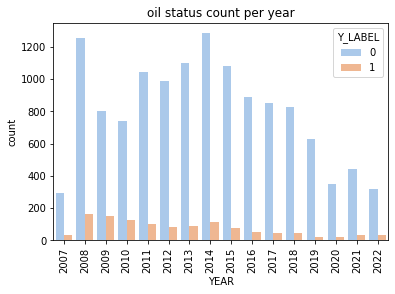

In [18]:
plt.figure()
sns.countplot(x='YEAR',data=train, hue='Y_LABEL')
sns.set_palette("pastel")
plt.title('oil status count per year')
plt.xticks(rotation=90)
plt.show()

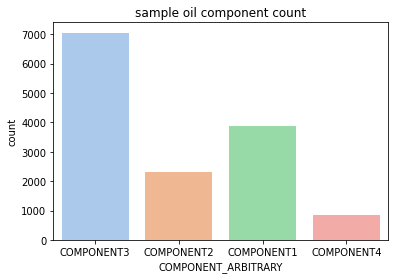

In [19]:
plt.figure()
sns.countplot(x='COMPONENT_ARBITRARY', data=train)
plt.title('sample oil component count')
plt.show()

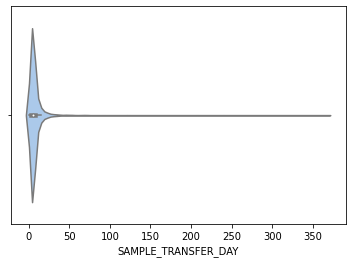

In [21]:
plt.figure()
sns.violinplot(train['SAMPLE_TRANSFER_DAY'])
plt.show()

# 2. 데이터 전처리

# 3. 모델 생성 및 학습

# 4. 제출

# 5. 결론
순위기준 : 대회규칙